In [125]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <center> **INTRODUCTION** <center/>
----
----


## __A. Latar Belakang Masalah__
Pembatalan pemesanan kamar hotel pada menit-menit terakhir meningkat dalam beberapa tahun terakhir. Banyak faktor yang dapat mempengaruhi pembatalan antara lain karena pelanggan sakit, perubahan jadwal meeting, perubahan jadwal liburan, kondisi cuaca yang buruk, dan berbagai macam faktor lainnya. Identifikasi yang dilakukan oleh [Chen dan Xie (2013)](https://drive.google.com/file/d/1yIRYqXT0pyztsBjNTc9Y68Y3g68KlSup/view?usp=sharing) dan [Chen, Schwartz, dan Vargas (2011)](https://daneshyari.com/article/preview/1010016.pdf), saat ini sebagian besar pelanggan melakukan pembatalan karena pelanggan ingin mendapatkan harga yang terbaik. Terkadang setelah melakukan pemesanan, pelanggan tetap melakukan pencarian lebih lanjut untuk product/service yang sama dengan yang sudah dipesan. Akibatnya, pelanggan akan melakukan pemesanan pada seluruh produk/jasa tersebut kemudian melakukan pembatalan pada saat-saat terakhir dan menyisakan satu yang terbaik. Hal ini merupakan dampak dari perkembangan teknologi digital yang memudahkan seseorang untuk melakukan pemesanan dan pembatalan kamar.

Karena mudahnya akses memesan dan membatalkan, hotel mengalami kerugian cukup signifikan. Sehingga, fenomena ini menjadi salah satu faktor yang digunakan oleh manajerial dalam membuat suatu kebijakan. Salah satunya adalah dengan menerapkan kebijakan yang cukup kaku. Selain itu, pihak manajerial juga menerapkan kebijakan seperti charge yang harus dibayarkan oleh pelanggan apabila melakukan pembatalan [(referensi)](https://pdfs.semanticscholar.org/f468/aaa140f7c1eb7aa37b9bca495ae76b82f654.pdf). Kebijakan yang diterapkan tersebut dapat membawa dampak negatif reputasi dan kinerja suatu hotel di masa mendatang karena pelanggan akan lebih memilih hotel yang dapat dilakukan pembatalan dengan kebijakan yang mudah dan tanpa terkena charge.

## __B. Pernyataan Masalah__
[Kitamoro dkk (2017)](https://drive.google.com/file/d/1lKGDvttJfGu8_-h42euX-NAsdoGOE3-p/view?usp=sharing) mengatakan bahwa para pemilik industri rata-rata ingin mengetahui keuntungan bisnisnya berdasarkan peramalan dari data yang telah mereka miliki. Akan tetapi, pada saat mencoba menerapkan metode prediksi tersebut, seringkali ditemukan masalah pada variabel data yang rata-rata terlalu umum dan tidak spesifik.

## __C. Goals__
Project ini menawarkan solusi atas masalah yang terjadi. Sebuah *machine learning* akand dibangun agar pemilik usaha khususnya pemilik hotel dapat melakukan prediksi apakah orang tersebut akan melakukan pembatalan ketika melakukan pemesanan kamar hotel atau tidak. Project ini akan menggunakan historical data yang sudah dikumpulkan dari beberapa pihak manajerial hotel yang ada di seluruh dunia ([sumber data](https://drive.google.com/file/d/12uB4vKhUUQj3brmQ4N7zfw8BwLYvfqzb/view?usp=sharing)). Sehingga, dengan adanya prediksi tersebut dapat diambil keputusan kebijakan oleh manajerial.

## __D. Limitasi Model__
Machine learning yang dibangun terbatas pada data yang diberikan. Oleh sebab itu, sangat memungkinkan terjadi perbedaan hasil dengan machine learning lain dengan model yang sama.

# <center> **EXPLORATORY DATA ANALYSIS** <center/>
----
----

## A.Tujuan Data Understanding
Sebelum membangun sebuah machine learning, perlu dilakukan analisis mengenai data yang akan digunakan. Hal ini dapat berguna untuk menentukan model machine learning yang akan dibangun.

In [126]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import warnings
warnings.filterwarnings('ignore')


# Set max columns
pd.set_option('display.max_columns', None)

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
#Load Dataset
df = pd.read_csv('data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [128]:
# Count and Datatype for each Column
print(f'Jumlah Baris dan Kolom di Dataset df Adalah {df.shape}')
df.info()

Jumlah Baris dan Kolom di Dataset df Adalah (83573, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [129]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


## B. Data Overview

Hasil diatas menampilkan dataset dari Hotel Booking Demand, dapat dilihat bahwa terdapat 11 kolom dan 83.573 baris dengan 5 diantaranya berupa kategorik dan lainnya adalah numerikal. Berikut merupakan informasi umum sebagai gambaran dari dataset tersebut:

**Deskripsi Kolom**

| Kolom | Keterangan 
|---|---|
| Country                       | Merupakan negara tempat hotel dipesan
| Market Segment                | Asal pemesanan
| Previous Cancellation         | Berapa kali pesanan dibatalkan sebelumnya
| Booking Changes               | Berapa kali pemesanan diubah sebelum keputusan akhir
| Deposit Type	                | Jenis deposit
| Days in Waiting List          | Jumlah hari pada saat pesanan masuk daftar tunggu
| Customer Type	                | Jenis pelanggan
| Reserved Room Type	        | Jenis ruangan yang dipesan
| Required Car Parking Spaces   | Kebutuhan ruang parkir mobil
| Total of Special Request	    | Total pesanan khusus
| Is Canceled                   | Status pemesanan akhir, apakah dibatalkan atau tidak

In [130]:
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


## C. Missing Value Handling
Sebelum melakukan Data Analysis, perlu dilakukan penanganan untuk missing value yang terdapat pada dataset. Hal ini bertujuan untuk meningkatkan akurasi dari hasil analisis nantinya.

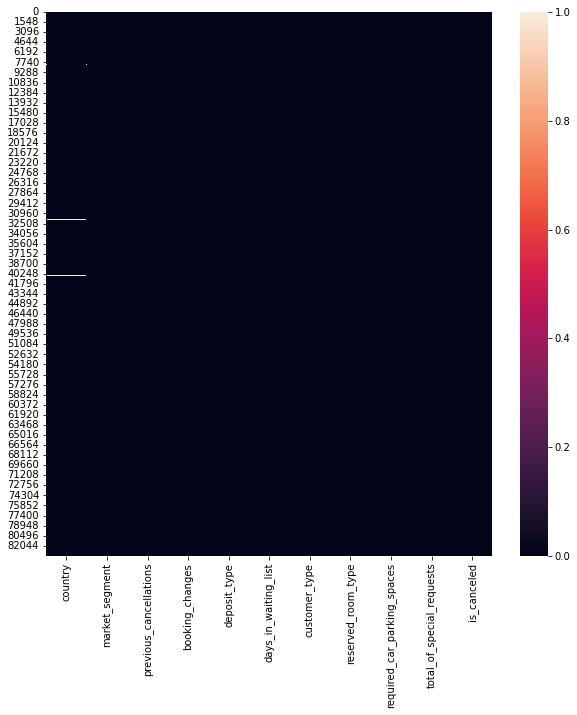

In [131]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['country','market_segment','previous_cancellations','booking_changes','deposit_type','days_in_waiting_list','customer_type','reserved_room_type','required_car_parking_spaces','total_of_special_requests','is_canceled']].isna())

In [132]:
df_analys = df.copy()

In [133]:
df_analys['country'].isna().sum()

351

Berdasarkan data di ats, dapat diketahui bahwa missing value hanya terdapat pada kolom country. Karena nilai missing value yang sangat kecil yaitu 0.4%. Nilai missing value ini kurang dari 1%, maka missing value dapat diisi dengan menggunakan data yang paling sering keluar ([referensi](http://bright-journal.org/Journal/index.php/JADS/article/view/20/7)).

In [134]:
df_analys['country'] = df_analys['country'].fillna(df['country'].mode()[0])

In [135]:
df_analys[['country']].isna().sum()

country    0
dtype: int64

## D. Data Duplicate Handling

In [136]:
df_analys.duplicated().sum()

73476

In [137]:
df_analys[df_analys.duplicated(keep='first')]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


Terdapat 73.476 data duplikat pada dataset ini. Akan tetapi, dikarenakan tidak terdapat kolom yang menyatakan parameter ID, data tersebut tidak dapat dihapus ataupun diolah lebih lanjut karena besar kemungkinan data duplikat terjadi karena tidak adanya parameter ID sehingga dapat terjadi transaksi yang sama.

## E. Feature Overview

### a. Berapa Banyak Booking yang Dibatalkan?

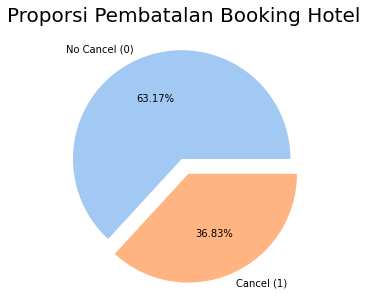

In [138]:
plt.figure(figsize=(5,5))
plt.pie(df_analys['is_canceled'].value_counts(),labels=['No Cancel (0)','Cancel (1)'],
    colors = sns.color_palette('pastel'),
    textprops={
        'size':10,
        'color':'black'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.1))
plt.title('Proporsi Pembatalan Booking Hotel',color='black',size=20)
plt.show()

Pie chart diatas menunjukkan proporsi pembatalan booking hotel atau tidak. Grafik menunjukkan proporsi antara booking tidak dibatalkan (kelas 0) lebih besar dibanding dengan booking dibatalkan (kelas 1). Proporsi untuk booking tidak dibatalkan yaitu 63.17%, sedangkan untuk booking dibatalkan sebesar 36.83%. Proporsi ini menunjukkan bahwa data yang ada masih dapat dibilang seimbang, karena proporsi salah satu nilai tidak kurang dari 25%. Seperti yang disebutkan pada ([referensi](https://link.springer.com/article/10.1007/s13748-016-0094-0)), Data dikatakan imbalance jika salah satu proporsi nilai kurang dari 25%.

### b. Bagaimana Hubungan Setiap Feature Terhadap Target?

In [139]:
print("\nStatistik Deskriptif : ")
df_analys.describe()


Statistik Deskriptif : 


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


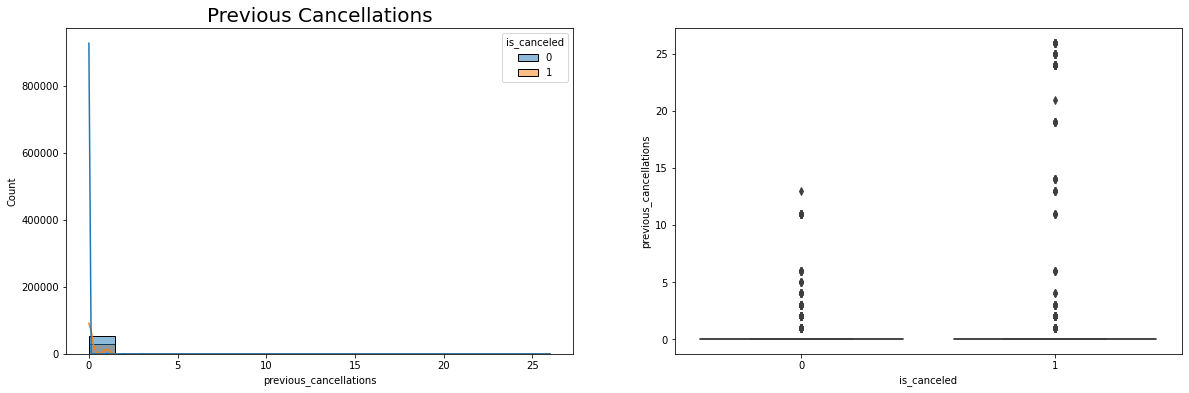

In [140]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(data=df_analys,x='previous_cancellations',hue='is_canceled',kde=True)
plt.title('Previous Cancellations',fontsize=20)

plt.subplot(122)
sns.boxplot(data=df,y='previous_cancellations', x='is_canceled')

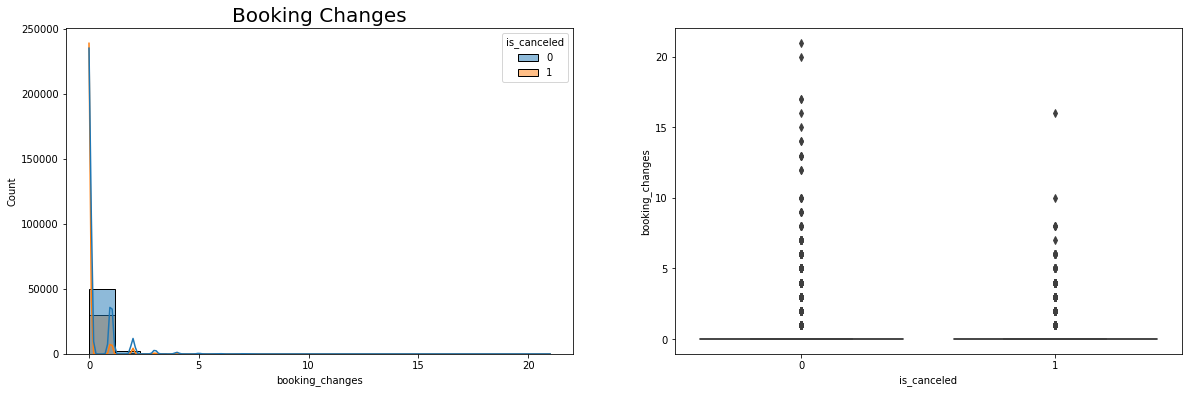

In [141]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(data=df_analys,x='booking_changes',hue='is_canceled',kde=True)
plt.title('Booking Changes',fontsize=20)

plt.subplot(122)
sns.boxplot(data=df,y='booking_changes', x='is_canceled')

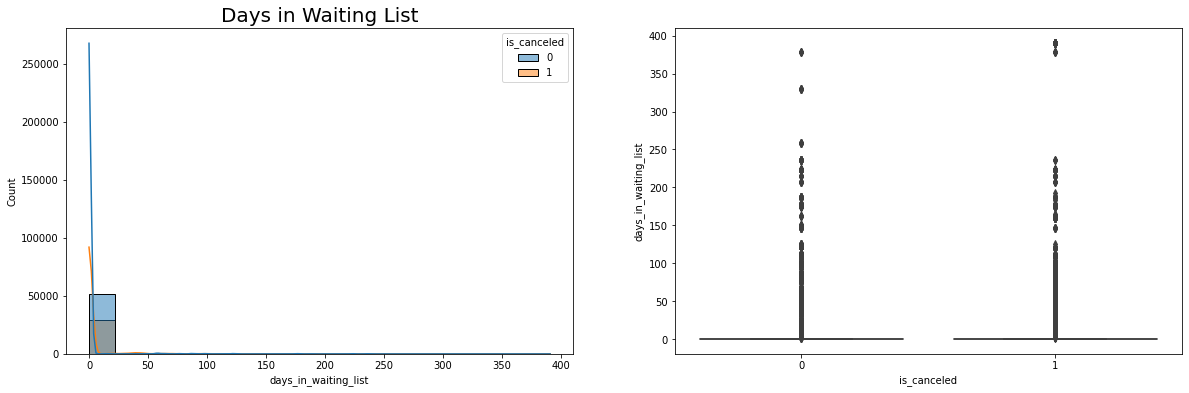

In [142]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(data=df_analys,x='days_in_waiting_list',hue='is_canceled',kde=True)
plt.title('Days in Waiting List',fontsize=20)

plt.subplot(122)
sns.boxplot(data=df,y='days_in_waiting_list', x='is_canceled')

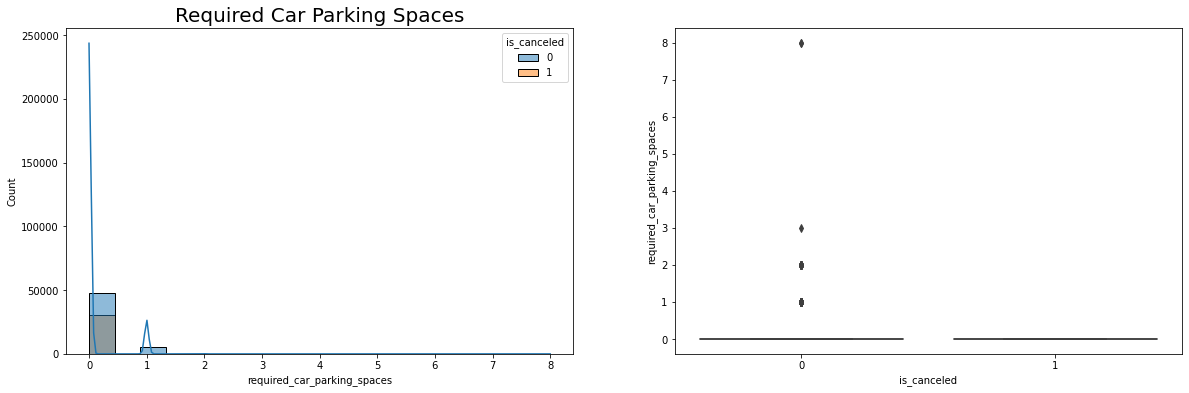

In [143]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(data=df_analys,x='required_car_parking_spaces',hue='is_canceled',kde=True)
plt.title('Required Car Parking Spaces',fontsize=20)

plt.subplot(122)
sns.boxplot(data=df,y='required_car_parking_spaces', x='is_canceled')

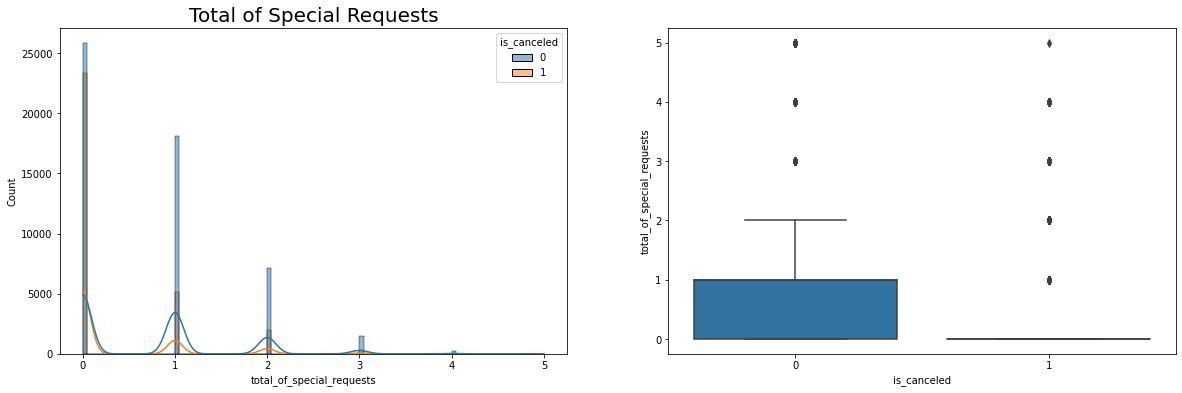

In [144]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(data=df_analys,x='total_of_special_requests',hue='is_canceled',kde=True)
plt.title('Total of Special Requests',fontsize=20)

plt.subplot(122)
sns.boxplot(data=df,y='total_of_special_requests', x='is_canceled')

Dari grafik di atas, dapat disimpulkan bahwa seluruh fitur memiliki pengaruh terhadap target.

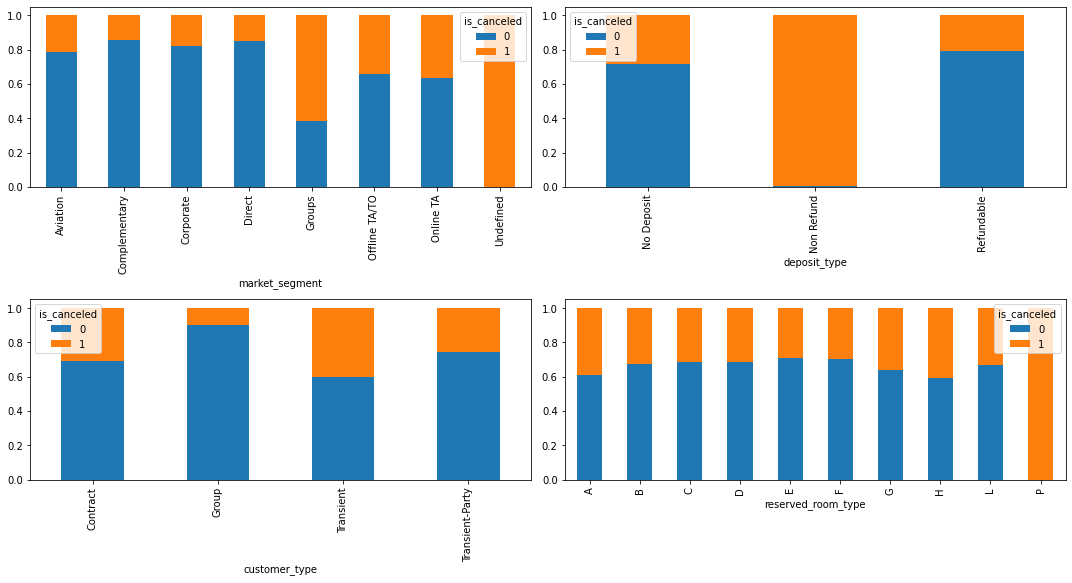

In [145]:
count = 0
fig = plt.figure(figsize=(15,15),)

for i in df_analys.drop(columns=['previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests','is_canceled','days_in_waiting_list','country']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

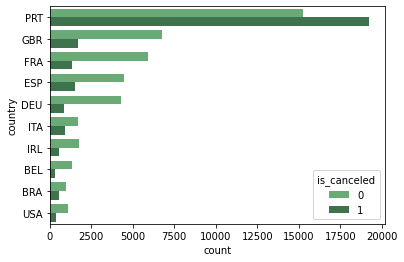

In [146]:
sns.countplot(y='country', hue='is_canceled', data=df_analys, palette='Greens_d',
              order=df_analys.country.value_counts().iloc[:10].index)

Dari grafik di atas, kita dapat mengambil beberapa kesimpulan antara lain:
1. Setiap market segment memiliki kemungkinan untuk melakukan pembatalan dan pembatalan paling sering dilakukan oleh market segment Group
2. Deposit type tidak berpengaruh terhadap pembatalan. Pelanggan tetap memiliki kemungkinan untuk melakukan pembatalan baik yang melakukan deposit maupun tidak.
3. Untuk customer type, pembatalan oleh customer dengan tipe transient.
4. Pembatalan paling sering dilakukan oleh pelanggan yang memilih kamar type P.
5. Di antara negara lainnya, Portugal paling sering melakukan pemesanan kamar hotel dan melakukan pembatalan kamar hotel.

# <center> **DATA PREPROCESSING** <center/>
----
----

## A. Data Cleaning, Feature Selection, dan Feature Engineering

### a. Feature Engineering
#### Preprocessing Scenario
preprocess :
- missing value : simple imputer with most frequency
- one hot encoding : market_segment, deposit_type, customer_type, reserved_room_type
- binary encoding : country
- no treatment : numerical

In [147]:
from sklearn import pipeline


one_hot_encoding = OneHotEncoder(handle_unknown='ignore')
one_hot_var = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']

# binary_encoding = ce.BinaryEncoder() # digunakan jika tdk ada missing value
# merangkai simple imputer (modus) dengan binary encoding kita gunakan pipeline
# jika ada missing value :

binary_encoding =  Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('binary encoder',ce.BinaryEncoder())
]) 
binary_var = ['country'] # ada yg missing

transformer = ColumnTransformer([
    ('one hot',one_hot_encoding,one_hot_var),
    ('binary',binary_encoding,binary_var)
    ],remainder='passthrough')


In [148]:
y=df["is_canceled"]
X=df.drop("is_canceled",axis=1)

In [149]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [150]:
X_test.shape

(25072, 10)

In [151]:
X_train.shape

(58501, 10)

In [152]:
# Apply preprocessing

X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

In [153]:
X_train_prep = pd.DataFrame(X_train_prep)
X_test_prep = pd.DataFrame(X_test_prep)

In [154]:
dummy_var = list(transformer.transformers_[0][1].get_feature_names())

In [155]:
binary_var = list(transformer.transformers_[1][1]['binary encoder'].get_feature_names())

In [156]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [157]:
features = dummy_var + binary_var + ['previous_cancellations','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']

In [158]:
# X_train.drop(X_train.columns[~X_train.columns.isin(X_test.columns)], 1)

In [159]:
X_train_prep.shape

(58501, 38)

In [160]:
X_test_prep.shape

(25072, 38)

In [161]:
X_train_prep.columns = features
X_test_prep.columns = features

In [162]:
X_train_prep

,x0_Aviation,x0_Complementary,x0_Corporate,x0_Direct,x0_Groups,x0_Offline TA/TO,x0_Online TA,x0_Undefined,x1_No Deposit,x1_Non Refund,x1_Refundable,x2_Contract,x2_Group,x2_Transient,x2_Transient-Party,x3_A,x3_B,x3_C,x3_D,x3_E,x3_F,x3_G,x3_H,x3_L,x3_P,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
58497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58498,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0
58499,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### b. Feature Selection

In [163]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=50)
select.fit(X_train_prep,y_train)
X_train_selected = select.transform(X_train_prep)
X_test_selected = select.transform(X_test_prep)

In [164]:
X_train_selected.shape

(58501, 19)

In [165]:
features

['x0_Aviation',
 'x0_Complementary',
 'x0_Corporate',
 'x0_Direct',
 'x0_Groups',
 'x0_Offline TA/TO',
 'x0_Online TA',
 'x0_Undefined',
 'x1_No Deposit',
 'x1_Non Refund',
 'x1_Refundable',
 'x2_Contract',
 'x2_Group',
 'x2_Transient',
 'x2_Transient-Party',
 'x3_A',
 'x3_B',
 'x3_C',
 'x3_D',
 'x3_E',
 'x3_F',
 'x3_G',
 'x3_H',
 'x3_L',
 'x3_P',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '0_7',
 'previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [166]:
select.get_support()

array([False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [167]:
df_selected = pd.DataFrame({
    'var':features,
    'indikator':select.get_support()
})
df_selected[df_selected['indikator']== True]['var'].values

array(['x0_Corporate', 'x0_Direct', 'x0_Groups', 'x1_No Deposit',
       'x1_Non Refund', 'x2_Transient', 'x2_Transient-Party', 'x3_A',
       'x3_D', '0_3', '0_4', '0_5', '0_6', '0_7',
       'previous_cancellations', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'], dtype=object)

In [168]:
#y train - Imbalanced data set
y_train.value_counts()/y_train.shape[0]*100

0    62.978411
1    37.021589
Name: is_canceled, dtype: float64

# <center> **MODELLING** <center/>
----
----

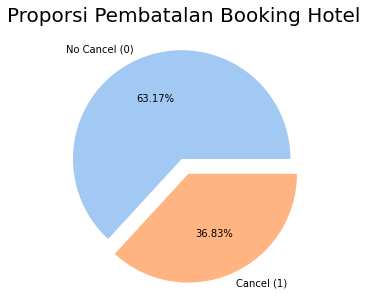

In [169]:
plt.figure(figsize=(5,5))
plt.pie(df['is_canceled'].value_counts(),labels=['No Cancel (0)','Cancel (1)'],
    colors = sns.color_palette('pastel'),
    textprops={
        'size':10,
        'color':'black'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.1))
plt.title('Proporsi Pembatalan Booking Hotel',color='black',size=20)
plt.show()

In [170]:
cancel = (df['is_canceled'] == 1).sum()
print("Total booking dibatalkan : ", cancel)
not_cancel = (df['is_canceled'] == 0).sum()
print("Total booking tidak dibatalkan : ", not_cancel)
total_booking = cancel + not_cancel
print("Total Booking: ", total_booking)
print("% Akurasi Worse Case Base line Berdasarkan Kelas Mayoritas: ", (not_cancel/total_booking) * 100, "%" )

Total booking dibatalkan :  30778
Total booking tidak dibatalkan :  52795
Total Booking:  83573
% Akurasi Worse Case Base line Berdasarkan Kelas Mayoritas:  63.17231641798189 %


## A. Model

1. Dalam modeling ini akan dilakukan scalling agar antar variabel memiliki skala yang sama. Scaling menjadi poin kritikal dalam proses preprocessing data, karena akan sangat mempengaruhi model yang dibuat. Scaler yang digunakan yaitu RobustScaler karena seperti yang bisa dilihat pada EDA sangat memungkinkan terdapat outlier pada fitur. Robust Scaler menjadi pilihan alternatif Min Max Scaler yang sensitif terhadap outlier [(referensi)](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

2. Matriks evaluasi yang dipilih adalah ROC_AUC, karena pengamatan pada model yang dibuat melibatkan probabilitas antara 2 kelas. Selain itu, matriks ini dipilih karena model tidak memiliki ketertarikan ke salah satu kelas

3. Model machine learing yang digunakan diantaranya, KNN, Decision Tree, Logistic Regression, dan Random Forest. Parameter yang diambil dalam pemilihan model dari [(referensi)](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-different-classification-models/) Beberapa diantaranya yaitu terkait kemudahan model untuk dipahami namun cukup efisien, model powerful dan akurat untuk menangani problem termasuk data non linear. 

In [171]:
scaler = RobustScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [172]:
# Define models
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
logreg = LogisticRegression(random_state=0)
rf = RandomForestClassifier(random_state=0)

# Define imbalance treatment methods
models = [knn, tree, logreg, rf]
score = []
nilai_mean = []
nilai_std = []

for i in models:
    
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='roc_auc', 
        error_score='raise'
        )

    print(model_cv, i)


    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

[0.84641379 0.84841023 0.85022468 0.85397197 0.85778639] KNeighborsClassifier()
[0.88131871 0.87908091 0.87663679 0.87151294 0.88159118] DecisionTreeClassifier(random_state=0)
[0.85385354 0.84752628 0.85136899 0.84920688 0.8486031 ] LogisticRegression(random_state=0)
[0.890803   0.88939116 0.88697906 0.8848961  0.89253014] RandomForestClassifier(random_state=0)


In [173]:
pd.DataFrame({
    'model':['knn', 'tree', 'logreg', 'rf'],
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,knn,0.851361,0.004064
1,tree,0.878028,0.003715
2,logreg,0.850112,0.002252
3,rf,0.888920,0.002711


Dari hasil cross validation di atas, dapat dilihat bahwa model random forest dan decision tree memiliki performa baik dan stabil jika dilihat dari nilai rata-rata ROC AUC score-nya dan standar deviasinya.

In [174]:
model_dt = DecisionTreeClassifier()

# Fitting
model_dt.fit(X_train_selected, y_train)

# Predict
y_pred_test_dt = model_dt.predict(X_test_selected)
y_pred_train_dt=model_dt.predict(X_train_selected)

# ROC_AUC metrics
roc_train_dt=roc_auc_score(y_train,y_pred_train_dt)
roc_test_dt=roc_auc_score(y_test,y_pred_test_dt)

data_DT={
  'DT Training':[roc_train_dt],
  'DT Testing':[roc_test_dt]
}

DT=(pd.DataFrame(data_DT,index=['ROC AUC']).T).round(4)

# Score Before Tuning
display(DT)

print('\n')
print('Classification Report: Train \n', classification_report(y_train,y_pred_train_dt))
print('Classification Report: Test \n', classification_report(y_test,y_pred_test_dt))

,ROC AUC
DT Training,0.7526
DT Testing,0.7347




Classification Report: Train 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86     36843
           1       0.86      0.56      0.68     21658

    accuracy                           0.80     58501
   macro avg       0.82      0.75      0.77     58501
weighted avg       0.81      0.80      0.79     58501

Classification Report: Test 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85     15952
           1       0.83      0.53      0.65      9120

    accuracy                           0.79     25072
   macro avg       0.80      0.73      0.75     25072
weighted avg       0.80      0.79      0.78     25072



In [175]:
model_rf = RandomForestClassifier()

# Fitting
model_rf.fit(X_train_selected, y_train)

# Predict
y_pred_test_rf = model_rf.predict(X_test_selected)
y_pred_train_rf = model_rf.predict(X_train_selected)

# ROC_AUC metrics
roc_train_rf=roc_auc_score(y_train,y_pred_train_rf)
roc_test_rf=roc_auc_score(y_test,y_pred_test_rf)

data_RF={
  'RF Training':[roc_train_rf],
  'RF Testing':[roc_test_rf]    
}

RF=(pd.DataFrame(data_RF,index=['ROC AUC']).T).round(4)

# display(score_before_tuning)
display(RF)

print('\n')
print('Classification Report: Train \n', classification_report(y_train,y_pred_train_rf))
print('Classification Report: Test \n', classification_report(y_test,y_pred_test_rf))

,ROC AUC
RF Training,0.7537
RF Testing,0.7360




Classification Report: Train 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86     36843
           1       0.86      0.56      0.68     21658

    accuracy                           0.80     58501
   macro avg       0.82      0.75      0.77     58501
weighted avg       0.81      0.80      0.79     58501

Classification Report: Test 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85     15952
           1       0.82      0.54      0.65      9120

    accuracy                           0.79     25072
   macro avg       0.80      0.74      0.75     25072
weighted avg       0.80      0.79      0.78     25072



## B. Hyperparameter Tuning

1. Hasil modeling berdasarkan data training maupun test untuk model Decision Tree dan Random Forest belum mencapai nilai 80% (roc auc metrics). Untuk itu akan dilakukan hyperparameter tuning untuk meningkatkan akurasi. Hyperparameter tuning dilakukan dengan memberikan adjustment parameter untuk masing-masing model. Parameter untuk Tree Based Model diantaranya 
  - Max depth : nilai maksimum kedalaman Tree
  - Min samples split : Jumlah minimum sampel yang diperlukan untuk membagi node
  - Min sample leaf : Jumlah minimum sampel yang diperlukan untuk berada di dalam node


2. Pemilihan RandomizedSearchCV karena kombinasi data yang akan di proses terlalu banyak. RandomizedSearchCV akan memilih secara acak dari keseluruhan kombinasi yang ada. Jika metode yang digunakan GridSearchCV maka beban prosesor komputer akan berat karena melakukan banyak sekali iterasi.

### a. Random Forest

In [176]:
rf_parameters = {"max_depth": [21,30],
                 "n_estimators": [10,100,1000],
                 "min_samples_split": [2,5],
                 'min_samples_leaf' : [2,4]
                 }
                 
rf_model = RandomForestClassifier()
rf_cv_model = RandomizedSearchCV(rf_model,
                           rf_parameters,
                           scoring='roc_auc',
                           cv = 3,
                           random_state = 0)
rf_cv_model.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [21, 30],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 100, 1000]},
                   random_state=0, scoring='roc_auc')

In [177]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}


In [179]:
rf_tuned = RandomForestClassifier(max_depth = 30,
                                  min_samples_leaf = 4,
                                  min_samples_split = 5,
                                  n_estimators = 1000)
rf_tuned.fit(X_train_selected, y_train)

# Predict
y_pred_test_rf_tuned = rf_tuned.predict(X_test_selected)
y_pred_train_rf_tuned = rf_tuned.predict(X_train_selected)

roc_train_rf_tuned=roc_auc_score(y_train,y_pred_train_rf_tuned)
roc_test_rf_tuned=roc_auc_score(y_test,y_pred_test_rf_tuned)

data_RF_tuned={
  'RF Training After Tuning':[roc_train_rf_tuned],
  'RF Testing After Tuning':[roc_test_rf_tuned]
}

RF_tuned=(pd.DataFrame(data_RF_tuned,index=['ROC AUC']).T).round(4)

# display(score_before_tuning)
display(RF_tuned)

print('\n')
print('Classification Report: Train \n', classification_report(y_train,y_pred_train_rf_tuned))
print('Classification Report: Test \n', classification_report(y_test,y_pred_test_rf_tuned))

,ROC AUC
RF Training After Tuning,0.7428
RF Testing After Tuning,0.7332




Classification Report: Train 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86     36843
           1       0.87      0.53      0.66     21658

    accuracy                           0.80     58501
   macro avg       0.82      0.74      0.76     58501
weighted avg       0.81      0.80      0.78     58501

Classification Report: Test 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85     15952
           1       0.85      0.52      0.64      9120

    accuracy                           0.79     25072
   macro avg       0.81      0.73      0.75     25072
weighted avg       0.80      0.79      0.78     25072



In [180]:
display(RF)
display(RF_tuned)

,ROC AUC
RF Training,0.7537
RF Testing,0.7360


,ROC AUC
RF Training After Tuning,0.7428
RF Testing After Tuning,0.7332


### b. Decision Tree

In [181]:
dt_parameters = {'max_depth' : np.arange(21, 30),
                 'min_samples_split' : np.arange(2, 5), 
                 'min_samples_leaf' : np.arange(2, 4)
                 }
                 
dt_model = DecisionTreeClassifier()
dt_cv_model = RandomizedSearchCV(dt_model,
                           dt_parameters,
                           scoring='roc_auc',
                           cv = 3,
                           random_state=0)
dt_cv_model.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([2, 3]),
                                        'min_samples_split': array([2, 3, 4])},
                   random_state=0, scoring='roc_auc')

In [182]:
print('Best parameters: ' + str(dt_cv_model.best_params_))

Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 26}


In [212]:
dt_tuned = DecisionTreeClassifier(max_depth = 26,
                                  min_samples_leaf=3,
                                  min_samples_split=2
                                  )
dt_tuned.fit(X_train_selected, y_train)

# Predict
y_pred_test_dt_tuned = dt_tuned.predict(X_test_selected)
y_pred_train_dt_tuned = dt_tuned.predict(X_train_selected)

roc_train_dt_tuned=roc_auc_score(y_train,y_pred_train_dt_tuned)
roc_test_dt_tuned=roc_auc_score(y_test,y_pred_test_dt_tuned)

data_DT_tuned={
  'DT Training After Tuning':[roc_train_dt_tuned],
  'DT Testing After Tuning':[roc_test_dt_tuned]
}

DT_tuned=(pd.DataFrame(data_DT_tuned,index=['ROC AUC']).T).round(4)

# display(score_before_tuning)
display(DT_tuned)

print('\n')
print('Classification Report: Train \n', classification_report(y_train,y_pred_train_dt_tuned))
print('Classification Report: Test \n', classification_report(y_test,y_pred_test_dt_tuned))

,ROC AUC
DT Training After Tuning,0.7483
DT Testing After Tuning,0.7353




Classification Report: Train 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86     36843
           1       0.86      0.55      0.67     21658

    accuracy                           0.80     58501
   macro avg       0.82      0.75      0.76     58501
weighted avg       0.81      0.80      0.79     58501

Classification Report: Test 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85     15952
           1       0.83      0.53      0.65      9120

    accuracy                           0.79     25072
   macro avg       0.81      0.74      0.75     25072
weighted avg       0.80      0.79      0.78     25072



In [213]:
display(DT)
display(DT_tuned)

,ROC AUC
DT Training,0.7526
DT Testing,0.7347


,ROC AUC
DT Training After Tuning,0.7483
DT Testing After Tuning,0.7353


# <center> **PENUTUP** <center/>
----
----

In [214]:
display(DT_tuned)

print('\n')
print('Classification Report: Train \n', classification_report(y_train,y_pred_train_dt_tuned))
print('Classification Report: Test \n', classification_report(y_test,y_pred_test_dt_tuned))

,ROC AUC
DT Training After Tuning,0.7483
DT Testing After Tuning,0.7353




Classification Report: Train 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86     36843
           1       0.86      0.55      0.67     21658

    accuracy                           0.80     58501
   macro avg       0.82      0.75      0.76     58501
weighted avg       0.81      0.80      0.79     58501

Classification Report: Test 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85     15952
           1       0.83      0.53      0.65      9120

    accuracy                           0.79     25072
   macro avg       0.81      0.74      0.75     25072
weighted avg       0.80      0.79      0.78     25072



## A. Kesimpulan

Berdasarkan hasil machine learning yang dibangun di atas, dapat disimpulkan antara lain:
1. Model machine learning yang digunakan yaitu Logistic Regression, Decision Tree, KNN, dan Random Forest
2. Evaluation metrics yang digunakan yaitu ROC AUC 
3. Hasil classification report dari model machine learning yang dibuat, dapat ditarik beberapa kesimpulan diantaranya :
  - model dapat meminimalkan tamu yang melakukan pembatalan namun dianggap tidak melakukan pembatalan (recall score). Dalam hal ini, model mampu memprediksi 94% tamu yang tidak melakukan pembatalan hotel dan 53% tamu yang melakukan pembatalan hotel. Maka terdapat 6% tamu yang melakukan pembatalan tapi dianggap tidak melakukan pembatalan
  - model dapat meminimalkan tamu yang tidak melakukan pembatalan namun dianggap melakukan pembatalan (precision score). Model mampu memprediksi 83% tamu yang melakukan pembatalan. 

## B. Rekomendasi
Dari hasil tersebut, rekomendasi yang diajukan antara lain:

Untuk mengatasi kerugian pembatalan hotel yang dilakukan oleh pelanggan, maka direkomendasikan beberapa alternatif sebagai berikut:

Skema A: Jika Pelanggan melakukan pembatalan kurang dari 1x24 jam:
1. Jika waktu pembatalan masih cukup panjang, maka gunakan OTA / VHO untuk membantu mencarikan tamu pengganti dengan kompensasi harga yang lebih baik
2. Mempermudah proses reservasi jika pemesanan kurang dari 1x24 jam untuk tamu pengganti
3.  Memberikan charge dengan nominal tertentu untuk menghindari tamu yang mudah melakukan pembatalan secara sepihak

Skema B: Jika pelanggan tidak melakukan proses check in atau dalam industri perhotelan disebut dengan No Show
1. Jika tamu menggunakan kartu kredit, dapat menggunakan uang muka sebagai jaminan
2. Jika tamu melakukan pemesanan jauh-jauh hari, maka dahulukan layanan Non-Refundable

Skema C: Pembatalan Sering Terjadi pada Hotel
1. Memberikan harga yang lebih bersaing untuk kamar dengan layanan non refundable
2. Lakukan pemeriksaan rutin sumber pemesanan yang paling sering melakukan pembatalan (misal: pembatalan paling sering dilakukan oleh OTA A, maka berikan kamar yang tersedia lebih sedikit di OTA A tersebut)
3. Dapat menggunakan lebih banyak OTA / VHO dan gunakan fasilitas OTA / VHO yang akan membantu mencarikan pelanggan jika terjadi pembatalan.
4. Terapkan skema batas waktu untuk kamar dengan layanan refundable (misal: pembatalan dapat dilakukan dan direfundable maksimal 1x24 jam atau lebih dari waktu tersebut).

## Potensi Keuntungan

Dengan adanya prediksi ini, pihak hotel dapat mengurangi kerugian sebesar, contoh :
- Total Kamar yang tersedia di Indonesia pada tahun 2021 adalah 345.062 ([sumber](https://www.bps.go.id/indicator/16/307/1/jumlah-akomodasi-kamar-dan-tempat-tidur-yang-tersedia-pada-hotel-bintang.html))
- Average Room Rate hotel di Indonesia = IDR 300.000,- / kamar
- Tingkat pembatalan hotel = 36.83% (Berdasarkan data di atas)
Misal skema Okupansi Hotel (keterisian kamar) adalah sebagai berikut:
a. Weekdays (Senin - Jumat) = 50% 
b. Weekend (Sabtu- Minggu) = 90%

Dalam waktu sebulan, jumlah kamar yang terjual di Indonesia:
Weekdays = 50% x 345.062 = 172.531 kamar
Weekend = 90% x 345.062 = 310.555 kamar
Total kamar terjual dalam 1 bulan = 483.086 kamar
Harga total kamar terjual dalam 1 bulan = 483.086 x IDR 300.000,- = IDR 144.925.800.000,-

Jika tingkat pembatalan hotel 36,83%, maka kerugian pariwisata hotel akibat pembatalan pesanan hotel adalah:
IDR 144.925.800.000,- x 36,83% = IDR 53.376.172.140,- / bulan
